In [1]:
import keras
# keras.__version__

/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words=10000)
# train_data[0][:20]
# train_labels[0]

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
# x_train[0][:20]

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_lables).astype('float32')

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 262us/step - loss: 0.5103 - acc: 0.7797 - val_loss: 0.3856 - val_acc: 0.8649
Epoch 2/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.3030 - acc: 0.9041 - val_loss: 0.3006 - val_acc: 0.8903
Epoch 3/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.2177 - acc: 0.9283 - val_loss: 0.3080 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.1734 - acc: 0.9440 - val_loss: 0.2818 - val_acc: 0.8861
Epoch 5/20
15000/15000 [==============================] - 3s 210us/step - loss: 0.1398 - acc: 0.9552 - val_loss: 0.2845 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.1118 - acc: 0.9664 - val_loss: 0.3115 - val_acc: 0.8784
Epoch 7/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.0940 - acc: 0.9725 - val_loss: 0.3150 - 

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])

In [11]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

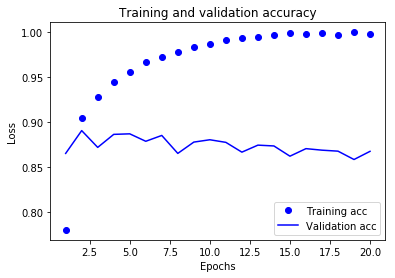

In [12]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.4720 - acc: 0.8210
Epoch 2/4
25000/25000 [==============================] - 4s 156us/step - loss: 0.2624 - acc: 0.9115
Epoch 3/4
25000/25000 [==============================] - 4s 162us/step - loss: 0.1983 - acc: 0.9308
Epoch 4/4
25000/25000 [==============================] - 2s 88us/step


In [14]:
results

[0.3239811464214325, 0.87252]

In [15]:
model.predict(x_test)

array([[0.12994203],
       [0.9997458 ],
       [0.2892813 ],
       ...,
       [0.07681877],
       [0.0453826 ],
       [0.47930565]], dtype=float32)

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 4s 161us/step - loss: 0.4477 - acc: 0.8325
Epoch 2/4
25000/25000 [==============================] - 4s 156us/step - loss: 0.2797 - acc: 0.9077
Epoch 3/4
25000/25000 [==============================] - 4s 159us/step - loss: 0.2214 - acc: 0.9244
Epoch 4/4
25000/25000 [==============================] - 2s 67us/step


array([[0.2617647 ],
       [0.999821  ],
       [0.8291659 ],
       ...,
       [0.1397489 ],
       [0.11718062],
       [0.48576444]], dtype=float32)

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 4s 174us/step - loss: 0.4618 - acc: 0.8197
Epoch 2/4
25000/25000 [==============================] - 4s 155us/step - loss: 0.2537 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 4s 159us/step - loss: 0.2021 - acc: 0.9252
Epoch 4/4
25000/25000 [==============================] - 2s 82us/step


array([[0.182781  ],
       [0.9999112 ],
       [0.71063036],
       ...,
       [0.08604397],
       [0.04576582],
       [0.4332026 ]], dtype=float32)